In [ ]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/field1.csv")

In [ ]:
data

,Date,DAILYPRODGAS,MONTHLYPRODGAS,GAS.CUMU.,DAILYCONDPROD,MONTHLYPRODCOND,COND.CUMU.,DAILYPRODOIL,MONTHLYPRODOIL,OIL.CUMU.,Days.Produced,DAILYWATER,MONTHLYWATER
0,5/31/1990,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0,0.000,NaN,NaN,0.0
1,6/30/1990,0.0,0.0,0.0,0.0,0.0,0.0,97.7,1758,1.758,18.0,0.0,0.0
2,7/31/1990,0.0,0.0,0.0,0.0,0.0,0.0,106.5,3302,5.060,31.0,1.0,26.0
3,8/31/1990,0.0,0.0,0.0,0.0,0.0,0.0,110.7,3431,8.491,31.0,1.0,27.0
4,9/30/1990,0.0,0.0,0.0,0.0,0.0,0.0,113.0,3390,11.881,30.0,1.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,12/31/2022,NaN,NaN,0.0,NaN,NaN,0.0,30.0,930,831.978,31.0,1.0,31.0
392,1/31/2023,NaN,NaN,0.0,NaN,NaN,0.0,30.0,930,832.908,31.0,1.0,31.0
393,2/28/2023,NaN,NaN,0.0,NaN,NaN,0.0,30.0,840,833.748,28.0,1.0,28.0
394,3/31/2023,NaN,NaN,0.0,NaN,NaN,0.0,30.0,930,834.678,31.0,1.0,31.0


In [ ]:
print("Column Names:")
print(data.columns.tolist())

Column Names:
['Date', 'DAILYPRODGAS', 'MONTHLYPRODGAS', 'GAS.CUMU.', 'DAILYCONDPROD', 'MONTHLYPRODCOND', 'COND.CUMU.', 'DAILYPRODOIL', 'MONTHLYPRODOIL', 'OIL.CUMU.', 'Days.Produced', 'DAILYWATER', 'MONTHLYWATER']


## Prodcution Trends

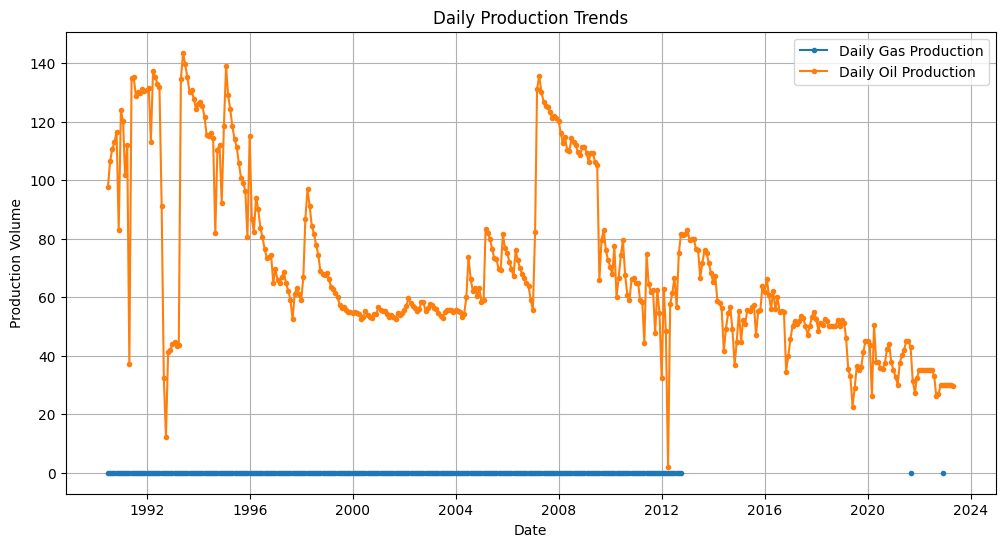

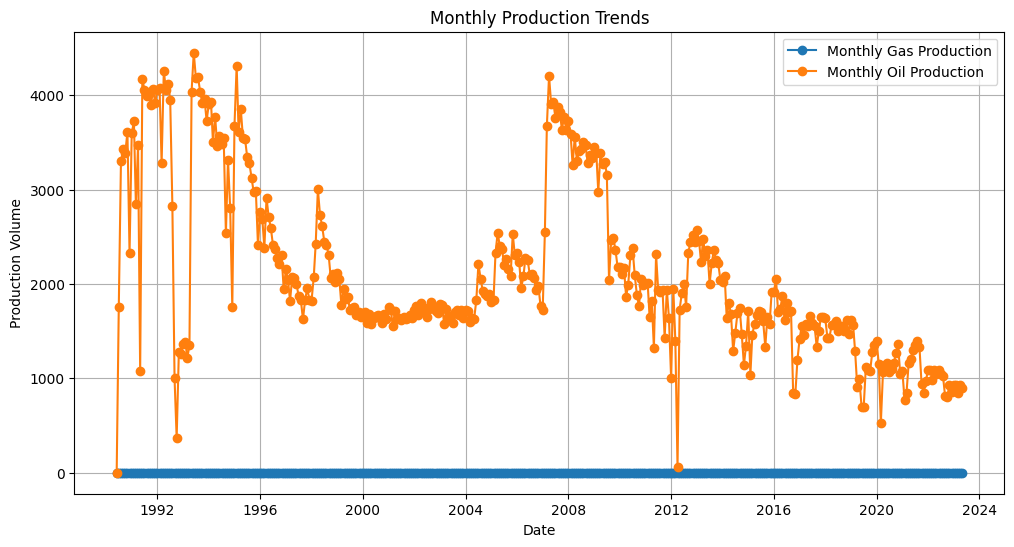

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

data.set_index('Date', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['DAILYPRODGAS'], label='Daily Gas Production', linestyle='-', marker='o', markersize=3)
plt.plot(data.index, data['DAILYPRODOIL'], label='Daily Oil Production', linestyle='-', marker='o', markersize=3)
plt.xlabel('Date')
plt.ylabel('Production Volume')
plt.title('Daily Production Trends')
plt.legend()
plt.grid(True)
plt.show()

monthly_data = data.resample('M').sum()
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['MONTHLYPRODGAS'], label='Monthly Gas Production', linestyle='-', marker='o', markersize=6)
plt.plot(monthly_data.index, monthly_data['MONTHLYPRODOIL'], label='Monthly Oil Production', linestyle='-', marker='o', markersize=6)
plt.xlabel('Date')
plt.ylabel('Production Volume')
plt.title('Monthly Production Trends')
plt.legend()
plt.grid(True)
plt.show()

## Cumulative Production

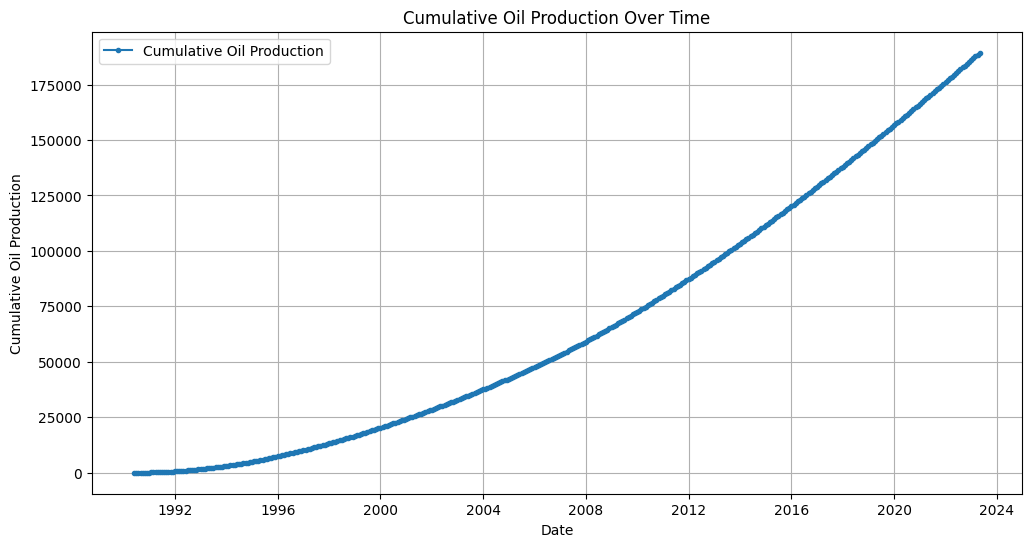

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data['CumulativeOilProduction'] = data['OIL.CUMU.'].cumsum()
data.set_index('Date', inplace=True)
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['CumulativeOilProduction'], label='Cumulative Oil Production', linestyle='-', marker='o', markersize=3)
plt.xlabel('Date')
plt.ylabel('Cumulative Oil Production')
plt.title('Cumulative Oil Production Over Time')
plt.legend()
plt.grid(True)
plt.show()

NameError: ignored

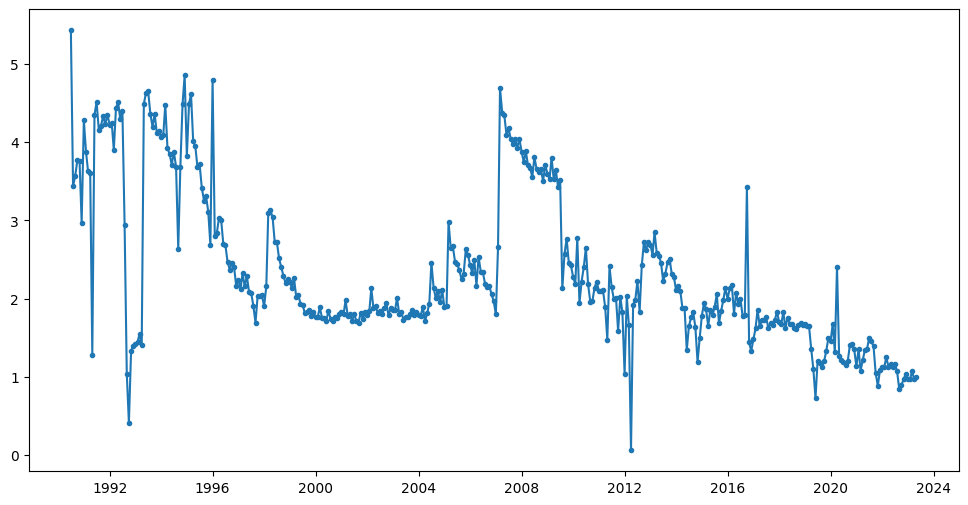

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data['ProductionEfficiency'] = data['DAILYPRODOIL'] / data['Days.Produced']
data.set_index('Date', inplace=True)
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(data.index, data['ProductionEfficiency'], label='Production Efficiency', linestyle='-', marker='o', markersize=3)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Production Efficiency')
plt.title('Production Efficiency Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()